In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import random
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# !conda install wordcloud
# import wordcloud
from wordcloud import WordCloud

In [2]:
amz=pd.read_csv("status text-2018.csv")
amz.sample(5)

status_text
64247   System changed from "PMT 222 - Hard Trim" to "...
61186   AIMs Pended:????Root Cause - Excessive warping...
6043    Agreed to proceed through UPV0 gateway as an o...
48663   Please close. Validated Vehicle Numbers: B8830...
279452  System changed from "CAM Drive" to "VCT (varia...

In [3]:
print(ENGLISH_STOP_WORDS)

frozenset({'since', 'too', 'anyway', 'wherein', 'them', 'any', 'will', 'towards', 'throughout', 'besides', 'few', 'anyone', 'up', 'by', 'become', 'done', 'per', 'thus', 'hence', 'interest', 'or', 'other', 'alone', 'whereby', 'nine', 'they', 'are', 'although', 'sometime', 'here', 'everywhere', 'three', 'anyhow', 'why', 'hereby', 'herself', 'often', 'whenever', 'therefore', 'empty', 'from', 'if', 'something', 'inc', 'who', 'our', 'both', 'themselves', 'still', 'only', 'becoming', 'hereafter', 'then', 'to', 'co', 'everyone', 'four', 'below', 'because', 'within', 'whereupon', 'whereas', 'side', 'thence', 'now', 'at', 'cant', 'a', 'do', 'anything', 'mill', 'always', 'should', 'whose', 'yourselves', 'around', 'others', 'next', 'none', 'back', 'thereafter', 'such', 'indeed', 'became', 'fill', 'either', 'he', 'namely', 'eg', 'with', 'never', 'latterly', 'thru', 'rather', 'formerly', 'hundred', 'when', 'otherwise', 'therein', 'former', 'six', 'ten', 'yourself', 'against', 'seem', 'enough', 'cou

In [4]:
print("Dimensions of dataset before dropping the NAs:",amz.shape)
amz = amz.dropna(subset=['status_text'])
print("Dimensions of dataset after dropping the NAs:",amz.shape)

Dimensions of dataset before dropping the NAs: (310104, 1)
Dimensions of dataset after dropping the NAs: (310104, 1)


In [5]:
# d=dict()
# wit=[]
# witout=[]
# total=0
# tot=0
# corpus = []
# ENGLISH_STOP_WORDS.extend(["changed","design"])
# stop_words = list(ENGLISH_STOP_WORDS)
# stop_words.extend(['changed','design','issue'])
# for i in range(1,len(amz)):
#     status_text = re.sub('[^a-zA-Z]', ' ', amz['status_text'][i])
#     status_text = status_text.lower()
#     status_text = status_text.split()
#     wit.append(len(status_text))
#     for word in status_text:
#         if (len(word)<6):
#             if word in d:
#                 d[word] = d[word] + 1
#             else:
#                 d[word] = 1
# #     ps = PorterStemmer()
# #     status_text = [ps.stem(word) for word in status_text
# #                 if not word in ENGLISH_STOP_WORDS]
#     status_text = [word for word in status_text
#                  if not word in stop_words]
#     witout.append(len(status_text))
    
#     statustext = ' '.join(status_text) 
#     corpus.append(statustext)
# # print(len(status_text))
# # print(witout)
# for ele in range(0, len(witout)):
#     total=total+witout[ele]
#     tot=tot+wit[ele]
# print(total)
# print(tot)

In [6]:
# dope = dict((k, v) for k, v in d.items() if v >= 20)

# marklist = sorted(dope.items(), key=lambda x:x[1], reverse=True)
# sortdict = dict(marklist)
# for key,val in sortdict.items(): 
#     print(key, ' : ', val)
# amz.head()

In [7]:
# tes=[]
# for key,val in sortdict.items():
#     if key in stop_words:
#         tes.append(key)
#         print(key, ' : ', val)

In [8]:
# for key,val in sortdict.items():
#     if key not in stop_words:
#         print(key, ' : ', val)

In [9]:
# res = len(set(sortdict.keys()) & set(stop_words))/ float(len(set(sortdict.keys()) | set(stop_words))) * 100
# ress = (len(tes) / len(sortdict.keys())) * 100
# resss = total / tot * 100
# print(res)
# print(ress)
# print(resss)
# # print(wit[:10])
# # print(witout[:10])

In [10]:
# corpus[:10]

In [11]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [12]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = amz['status_text'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [13]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

80234
['1a381', '1a484', '1aa', '1ab', '1ac', '1ad', '1already', '1and', '1april', '1aug', '1b', '1b281', '1ba', '1bar', '1be', '1c', '1c45', '1case', '1cc', '1clip', '1cm', '1cny', '1cr', '1cycle', '1d', '1da', '1day', '1db', '1dc', '1dec', '1deg', '1degc', '1degree', '1degrees', '1din', '1dj', '1due', '1e', '1e065', '1ec', '1eo', '1fa6p8cf1j5115995', '1fa6p8cf2j5100082', '1fa6p8cf2j5100213', '1fa6p8cf3j5100043', '1fa6p8cf3js100061', '1fa6p8cf5j5100111', '1fa6p8cf6h5206321', '1fa6p8cf8js100086', '1fa6p8cf9j5100029', '1fa6p8lh9j5116006', '1fa6p8nf0j5115953', '1fa6p8nf2j5115954', '1fa6p8nf5j5115981', '1fa6p8th0j5100101', '1fa6p8th1j5120048', '1fa6p8th1j5120051', '1fa6p8th1j5120065', '1fa6p8th3j5120049', '1fa6p8th3j5120066', '1fa6p8th4j5115961', '1fa6p8th6j5100023', '1fa6p8th7j5115968', '1fa6p8th9j5115972', '1fa6p8thxj5100204', '1fa6p8thxj5100219', '1fa6p8thxj5100221', '1fa6p8thxj5100227', '1fa6p8thxj5100255', '1fa6p8thxj5120064', '1fa6p8thxjs200028', '1fadp5au1jl100013', '1fadp5au3jl100

C:\Users\Shobika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

C:\Users\Shobika\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


30587
["''", "'a", "'as", "'b", "'bubles'", "'bumper", "'bus'", "'c", "'care", "'confirmation'", "'d", "'dt'", "'electr", "'for", "'hd'", "'horn'", "'in", "'infotainment'", "'more", "'mp", "'n", "'no", "'non", "'o", "'one", "'oper", "'optimum", "'p", "'pass", "'pdl", "'poor", "'pre", "'preferred'", "'s", "'these", "'toler", "'track", "'unspecifi", "'v", "'vehicl", "'what", "a'", 'aa', 'aaa', 'aab', 'aabdolla', 'aabramzo', 'aac', 'aaca', 'aachim']


In [15]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

In [16]:
print(words[250:300])

['dragon', 'draw', 'drive', 'driver', 'drop', 'dtc', 'dtp', 'dup', 'duplic', 'durabl', 'dure', 'dv', 'dva', 'dynam', 'e', 'ed', 'edg', 'ees', 'effect', 'effici', 'effort', 'electr', 'electron', 'elimin', 'email', 'end', 'engag', 'engin', 'ensur', 'enter', 'entri', 'eol', 'ept', 'equip', 'ergo', 'ergonom', 'error', 'escal', 'establish', 'estim', 'eu', 'evalu', 'event', 'evid', 'excess', 'exhaust', 'exist', 'exit', 'expect', 'extend']


In [18]:
kmeans = KMeans(n_clusters = 20, n_init = 20)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : updat, cad, pend, aim, close, issu, attach, review, new, pleas, softwar, team, fp, illustr, c, process, pp, requir, need, request, date, releas, supplier, design, vehicl
1 : nmp, content, launch, manag, pvt, refer, carryov, agre, previous, aim, number, carri, pleas, fce, mce, insert, approv, close, process, perform, attach, dup, tgw, pls, f
2 : pmt, chang, bodi, electr, interior, trim, exterior, powertrain, multimedia, engin, chassi, seat, electron, driver, secur, ed, consol, e, hard, sync, vehicl, control, lid, panel, closur
3 : manufactur, type, design, issu, chang, qualiti, valu, previous, pat, agre, aim, intern, pleas, supplier, current, align, root, caus, recommend, open, confirm, unless, meet, reopen, clear
4 : risk, green, red, chang, yellow, valu, previous, current, solut, identifi, comment, known, agre, cad, confirm, level, rais, avail, potenti, aim, form, engin, issu, await, fix
5 : ica, chang, implement, valu, previous, descript, date, jun, apr, mar, oct, aug, ckennar, j

In [19]:
# count=0
# indices_max = [index for index, value in enumerate(kmeans.labels_) if value==9]
# for rev_index in indices_max:
#     count=count+1
#     print(rev_index, str(amz.iloc[rev_index]))
#     print("\n")
# print(count)

In [21]:
import csv
count=0
from itertools import repeat
clusters = [[] for i in repeat(None, 20)]
for x in range(0,20):
    indices_max = [index for index, value in enumerate(kmeans.labels_) if value==x]
    clusters[x]=amz.iloc[indices_max]
for i in range(0,20):
    print(clusters[i])

                                              status_text
23                 Requested status update from Tom Toth.
84                 Requested status update from Tom Toth.
138     Based on latest status update, can issue be pe...
155     Per C. Horbal, to close need: 1) 543 chart is ...
156     543 Rev F is in process of release, est. June ...
...                                                   ...
310000  Team aligned to fix this issue, now solution i...
310069  DMF design update under investigation, with sp...
310084  Casting changes to IEM septum complete. Mold c...
310101  PDL is updated, and no issued so far.??request...
310102  AIM pend and close as per PDL was updated. The...

[10953 rows x 1 columns]
                                              status_text
95453   Approval from PVT Manager and NMP Manager atta...
98855   Carryover FCE - Approved by 18MY NMP Launch Ma...
103523   Approved Carryover FCE by PVT and NMP management
108623                    Approved per NMP/PVT

In [24]:
for x in range(0,20):
    indices_max = [index for index, value in enumerate(kmeans.labels_) if value==x]
    print(len(indices_max))
    print(len(kmeans.labels_))
    print((len(indices_max)/len(kmeans.labels_))*100)
    print("\n")

10953
310104
3.5320408637102387


6888
310104
2.221190310347496


9570
310104
3.08606145035214


4853
310104
1.5649588525139952


4555
310104
1.468862059180146


18008
310104
5.8070840750199935


10262
310104
3.3092123932616153


3658
310104
1.1796042617960425


16705
310104
5.386902458530042


15546
310104
5.013156876402755


126090
310104
40.66055258880892


5077
310104
1.637192683744808


7840
310104
2.528184093078451


26164
310104
8.437169465727628


10309
310104
3.3243685989216525


6763
310104
2.180881252741016


8273
310104
2.667814668627299


5796
310104
1.8690503830972836


6713
310104
2.164757629698424


6081
310104
1.9609550344400588




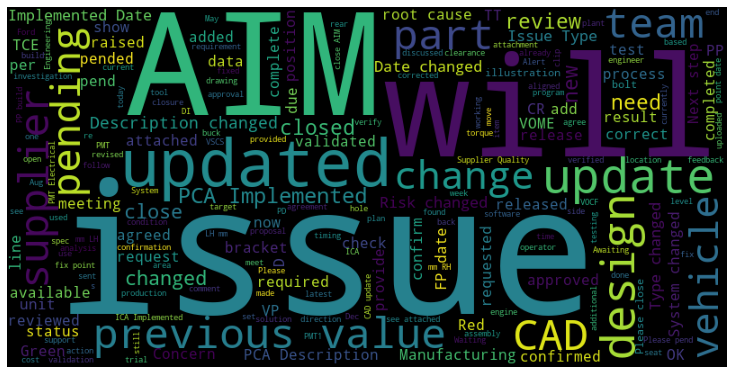

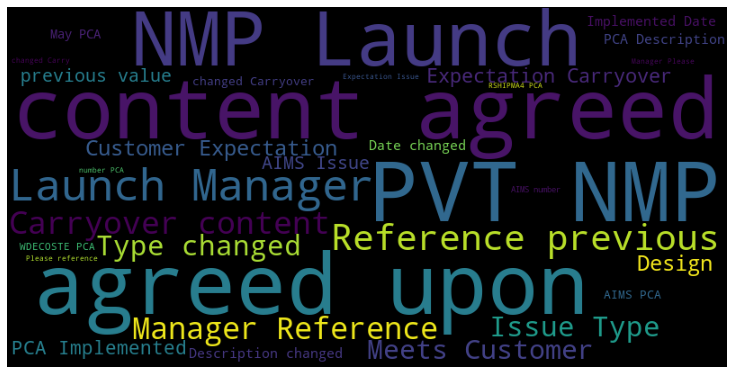

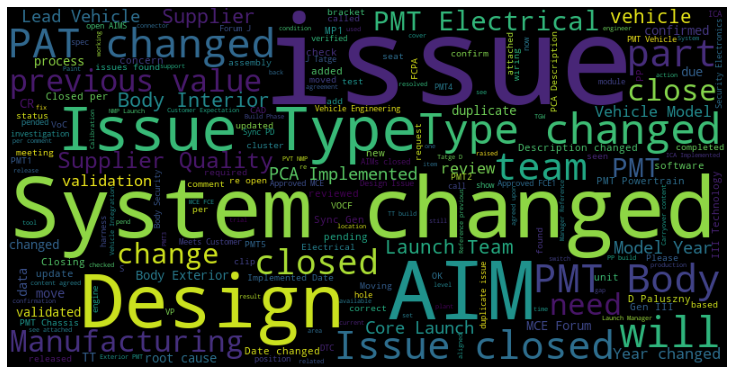

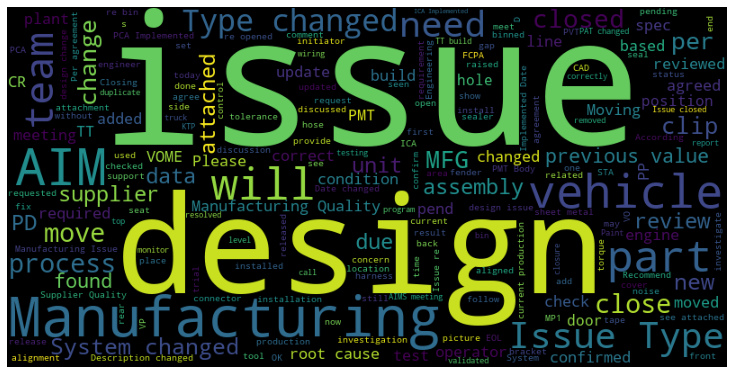

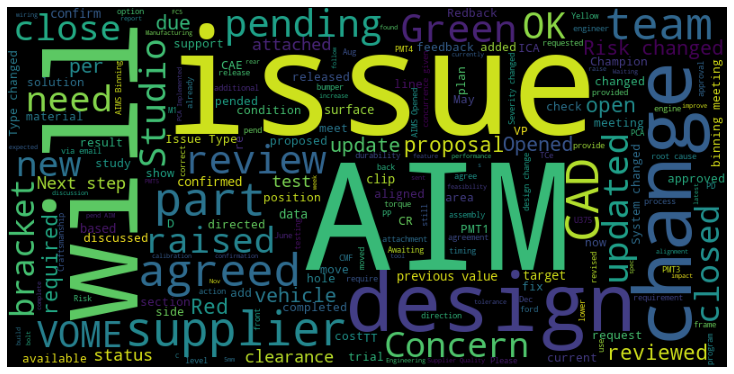

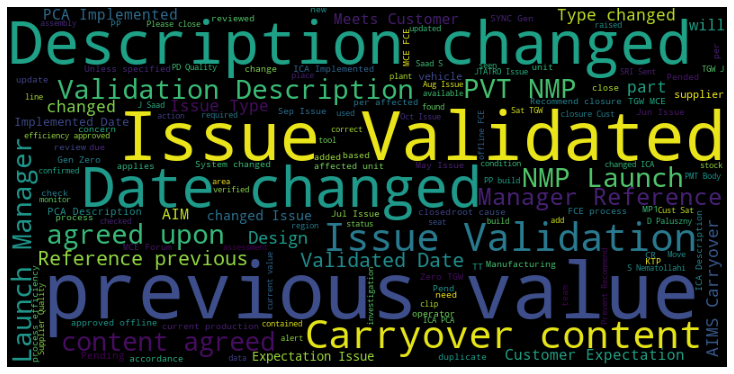

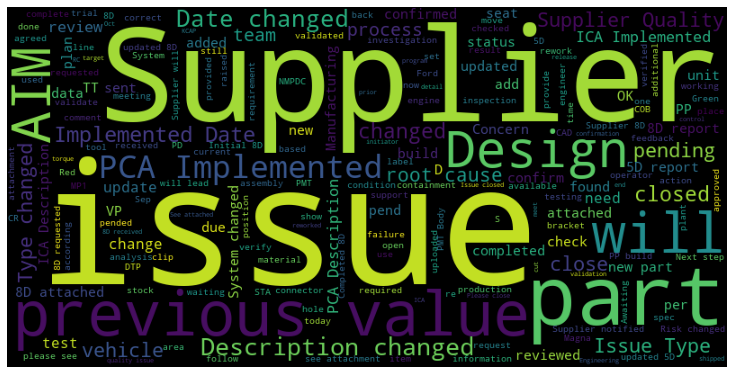

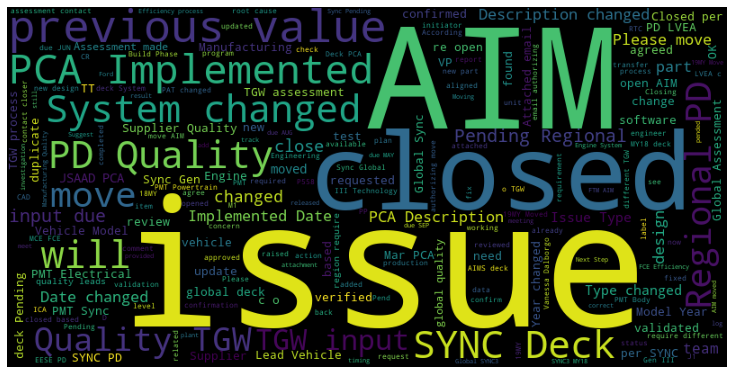

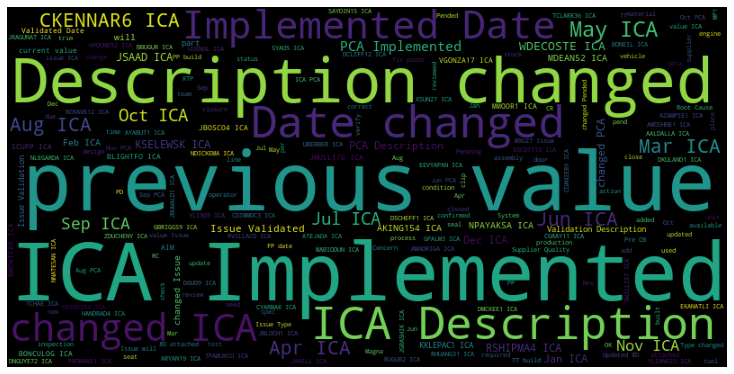

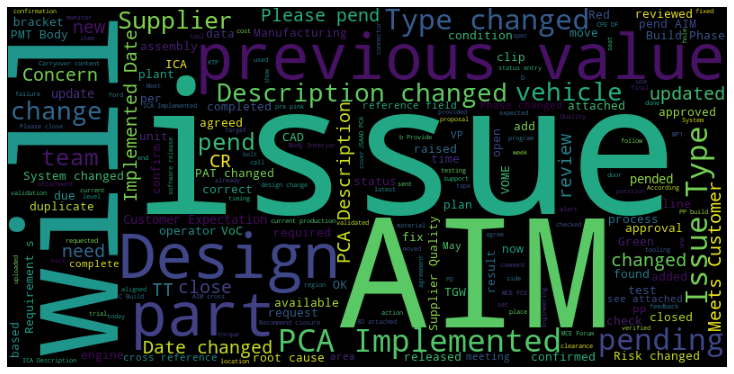

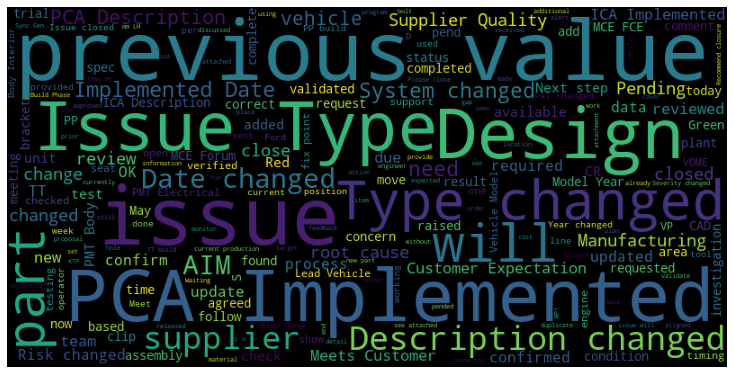

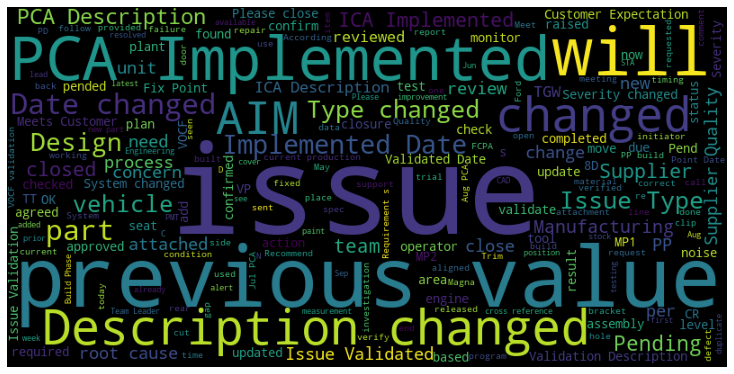

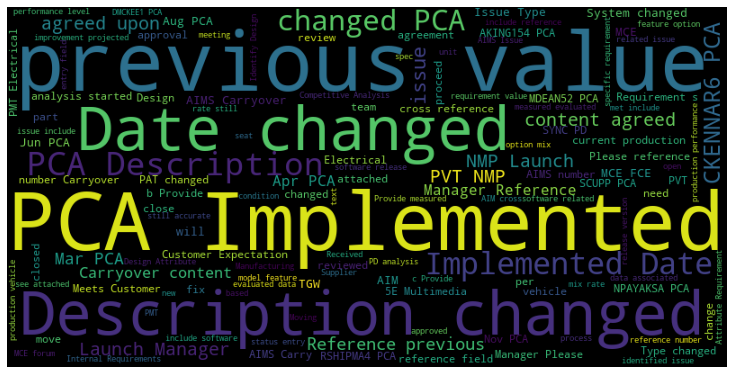

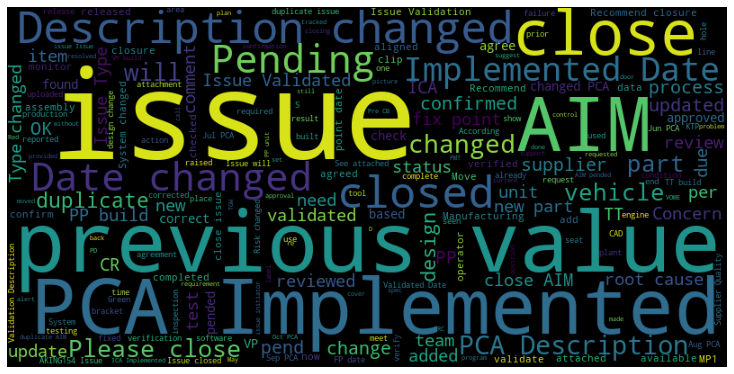

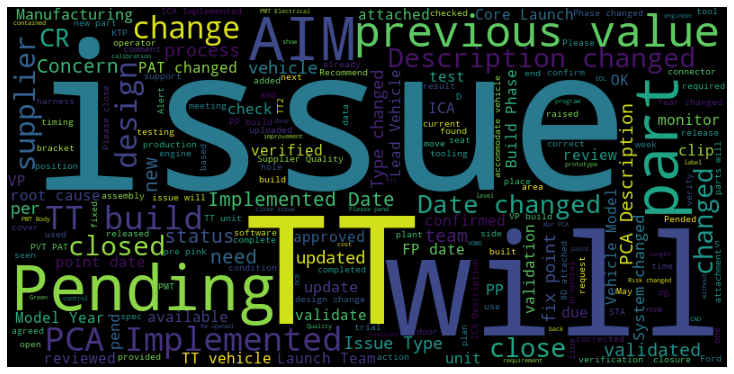

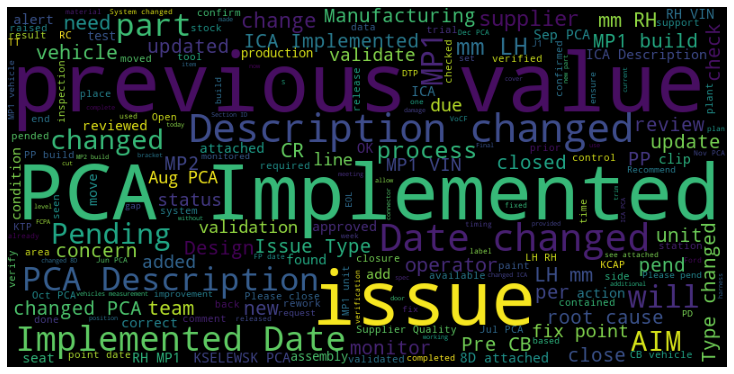

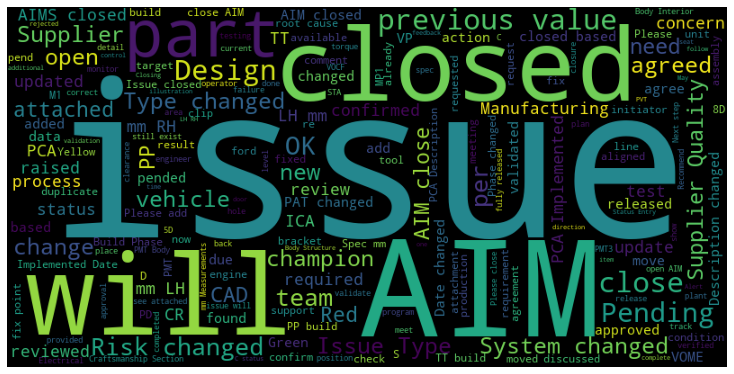

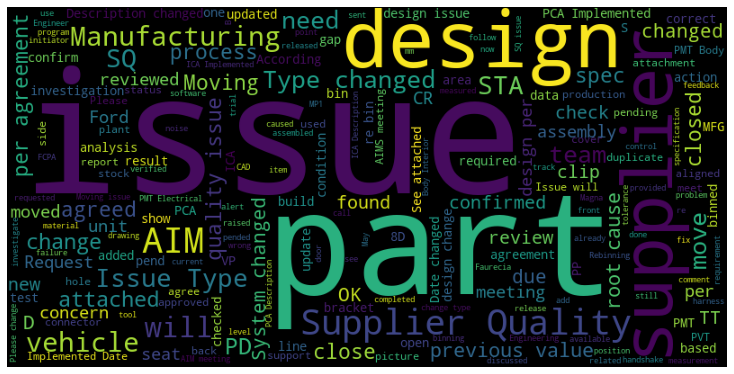

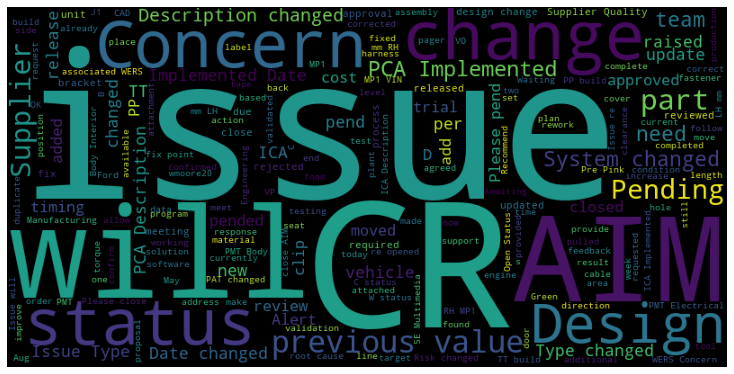

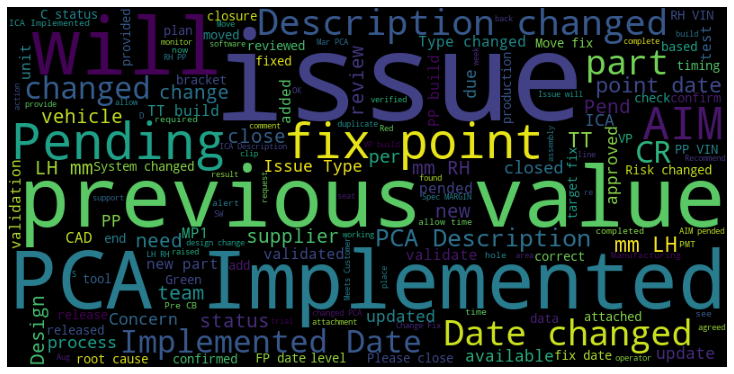

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [28]:
for x in range(0,len(kmeans.labels_)):
    dense=' '.join(desc[i-1] for i,value in enumerate(kmeans.labels_) if value==x)
    wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(dense)

    plt.figure(figsize=(10,10), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
 
    plt.show()